# Trazadores

Gráficos de caracterización de trazadores, inyección y salida.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
FOLDER = "trazadores"

In [3]:
os.makedirs(FOLDER, exist_ok=True)

## Pulso

La inyección de un pulso se modela usando un **delta de dirac**:

$$
\delta(x) = \left \{
    \begin{matrix}
        0 & \; & x \neq 0 \\
        \infty & \; & x = 0
    \end{matrix}
\right .
$$

### Inyección

Se realiza el grafico para la inyección de trazador. Como $\infty$ no se puede graficar se usará solo la concentración inicial $C_{0}$

In [4]:
t_max = 15  # min
t = np.linspace(- t_max / 2, t_max / 2, 100)

C0 = 10  # M
c = np.zeros(100)
c[100 // 2] = C0

In [5]:
# Definiendo función de gráfico

def grafico_concentracion_tiempo(tiempo, concentracion, label=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    if label is None:
        ax.plot(tiempo, concentracion)
    else:
        ax.plot(tiempo, concentracion, label=label)
    ax.set_xlim(tiempo[0], tiempo[-1])
    ax.set_ylim(0, max(concentracion) + 0.5)

    ax.set_xlabel("tiempo [min]", fontsize=14)
    ax.set_ylabel("Concentración [M]", fontsize=14)
    return fig, ax

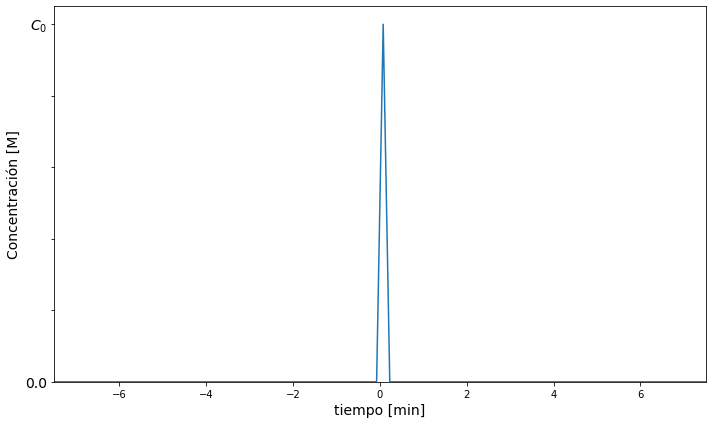

In [6]:
fig, ax = grafico_concentracion_tiempo(t, c)
ax.yaxis.set_ticks(np.linspace(0, C0, 6))
ax.set_yticklabels(
    [0.0] + [''] * 4 + [r'$C_{0}$'], fontsize=14
)
fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "inyeccion_pulso.png"))

### Respuesta

Grafico de salida del trazador

#### PFR Ideal

Salida del trazador en un PFR ideal

In [7]:
t_max = 15  # min
tau = 7.5  # min
t = np.linspace(0, t_max, 200)

C0 = 10  # M
c = np.zeros(200)
c[abs(t - tau) < 0.05] = C0

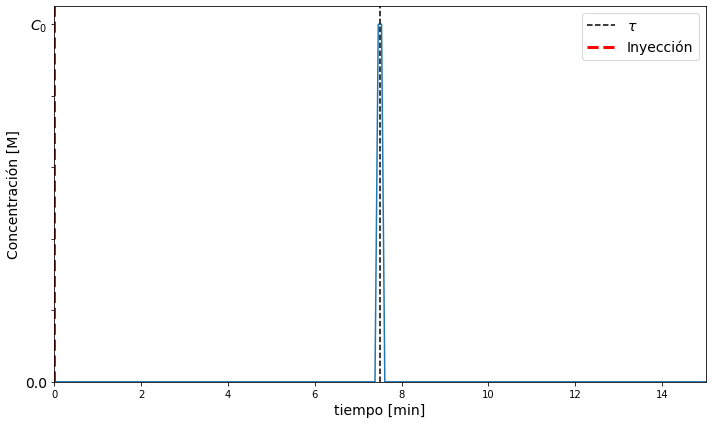

In [8]:
fig, ax = grafico_concentracion_tiempo(t, c)
ax.axvline(x = tau, color="k", linestyle="--", label=r"$\tau$")
ax.axvline(x = 0, color="r", linestyle="--", label="Inyección", linewidth=3)
ax.legend(fontsize=14)
ax.yaxis.set_ticks(np.linspace(0, C0, 6))
ax.set_yticklabels(
    [0.0] + [''] * 4 + [r'$C_{0}$'], fontsize=14
)
fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "salida_pulso_pfr_ideal.png"))

#### CSTR Ideal

Salida del trazador en un CSTR ideal. De la ecuación

$$
C = C_{0} \exp \left (-\frac{t}{\tau} \right )
$$

In [9]:
t_max = 30  # min
tau = 7.5  # min
t = np.linspace(0, t_max, 200)

C0 = 10  # M
c = C0 * np.exp(-t / tau)

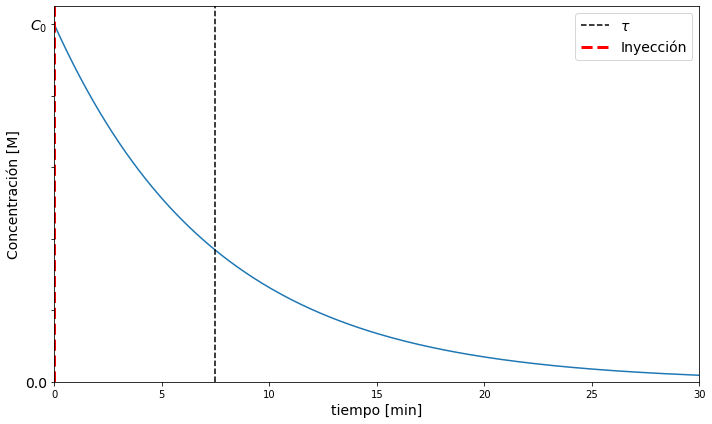

In [10]:
fig, ax = grafico_concentracion_tiempo(t, c)
ax.axvline(x = tau, color="k", linestyle="--", label=r"$\tau$")
ax.axvline(x = 0, color="r", linestyle="--", label="Inyección", linewidth=3)
ax.legend(fontsize=14)
ax.yaxis.set_ticks(np.linspace(0, C0, 6))
ax.set_yticklabels(
    [0.0] + [''] * 4 + [r'$C_{0}$'], fontsize=14
)
fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "salida_pulso_cstr_ideal.png"))

## Escalón

La función escalón se modela usando:

$$
C_{0}(t) = \left \{
    \begin{matrix}
        0 & \; & t < 0 \\
        C_{0}\;cte & \; & t \geq 0
    \end{matrix}
\right .
$$

### Inyección

Grafico de inyección de trazador en escalón

In [11]:
t_max = 15  # min
t = np.linspace(- t_max / 2, t_max / 2, 100)

C0 = 10  # M
c_half = [0] * (100 // 2)
c_other_half = [C0] * (100 // 2)
c = np.array(c_half + c_other_half)

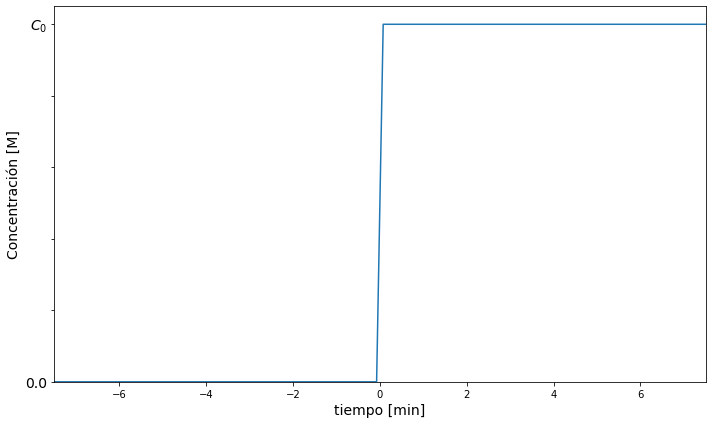

In [12]:
fig, ax = grafico_concentracion_tiempo(t, c)
ax.yaxis.set_ticks(np.linspace(0, C0, 6))
ax.set_yticklabels(
    [0.0] + [''] * 4 + [r'$C_{0}$'], fontsize=14
)
fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "inyeccion_escalon.png"))

## Modelos

Modelos para la desviación de la idealidad

### CSTR Modelos

Salida del trazador en un CSTR modelado. Siendo la concentración de salida:

$$
C = C_{0} \exp \left (-\frac{t}{\tau} \right )
$$

Considerando el ideal:

**Ideal**:
$$
\tau_{\text{ideal}} = \tau = \frac{V}{v_{0}}
$$


**Con bypasss**:

$$
\tau_{SB} = \frac{V {v}_{SB}^{2}}{v_{0}}
$$

Con:
$$
v_{SB} < v_{0}
$$

**Volumen muerto**:

$$
\tau_{SD} = \frac{V_{SD}}{v_{0}}
$$

Con:
$$
V_{SD} < V
$$

In [13]:
t_max = 30  # min
tau_ideal = tau = 7.5  # min
t = np.linspace(0, t_max, 200)

# Ideal
V = 1  # L
v0 = V / tau_ideal  # L / min

# Bypass
v_sb = 0.8 * v0
tau_sb = V * v0 / np.power(v_sb, 2)

# Volumen muerto
V_sd = 0.8 * V
tau_sd = V_sd / v0

C0 = 10  # 
c_ideal = C0 * np.exp(-t / tau_ideal)
c_sb = C0 * np.exp(-t / tau_sb)
c_sd = C0 * np.exp(-t / tau_sd)

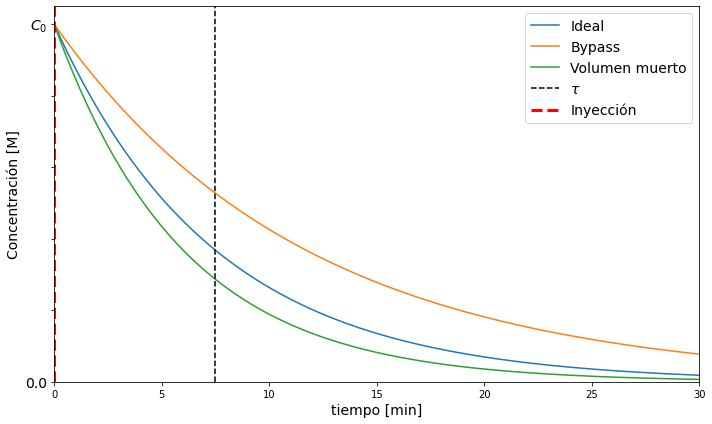

In [14]:
fig, ax = grafico_concentracion_tiempo(t, c_ideal, label="Ideal")
ax.plot(t, c_sb, label="Bypass")
ax.plot(t, c_sd, label="Volumen muerto")
ax.axvline(x = tau, color="k", linestyle="--", label=r"$\tau$")
ax.axvline(x = 0, color="r", linestyle="--", label="Inyección", linewidth=3)
ax.legend(fontsize=14)
ax.yaxis.set_ticks(np.linspace(0, C0, 6))
ax.set_yticklabels(
    [0.0] + [''] * 4 + [r'$C_{0}$'], fontsize=14
)
fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "salida_pulso_cstr_model_concentracion.png"))

In [15]:
e_ideal = c_ideal / (C0 * tau_ideal)
e_sb = c_sb / (C0 * tau_sb)
e_sd = c_sd / (C0 * tau_sd)

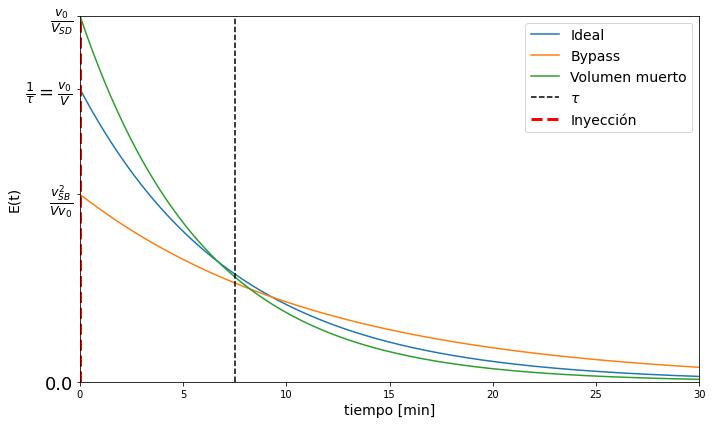

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, e_ideal, label="Ideal")
ax.plot(t, e_sb, label="Bypass")
ax.plot(t, e_sd, label="Volumen muerto")

ax.set_xlim(t[0], t[-1])
ax.set_ylim(0, max(e_sd))

ax.set_xlabel("tiempo [min]", fontsize=14)
ax.set_ylabel("E(t)", fontsize=14)

ax.axvline(x = tau, color="k", linestyle="--", label=r"$\tau$")
ax.axvline(x = 0, color="r", linestyle="--", label="Inyección", linewidth=3)
ax.legend(fontsize=14)
ax.yaxis.set_ticks(sorted([0, 1/tau_ideal, 1/tau_sb, 1/tau_sd]))
ax.set_yticklabels(
    [0.0, r'$\frac{v_{SB}^{2}}{V{v}_{0}}$',
     r'$\frac{1}{\tau} = \frac{v_{0}}{V}$',
     r'$\frac{v_{0}}{V_{SD}}$'], fontsize=18
)
fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "salida_pulso_cstr_model_e.png"))

### Modelos PFR

Salida del trazador en un PFR modelado. Siendo la concentración de salida también un pulso que saldrá en tiempo $\tau$:

Considerando el ideal:

**Ideal**:
$$
\tau_{\text{ideal}} = \tau = \frac{V}{v_{0}}
$$


**Con bypasss**:

$$
\tau_{SB} = \frac{V {v}_{SB}^{2}}{v_{0}}
$$

Con:
$$
v_{SB} < v_{0}
$$

**Volumen muerto**:

$$
\tau_{SD} = \frac{V_{SD}}{v_{0}}
$$

Con:
$$
V_{SD} < V
$$

In [17]:
t_max = 15  # min
tau_ideal = tau = 7.5  # min
t = np.linspace(0, t_max, 200)

# Ideal
V = 1  # L
v0 = V / tau_ideal  # L / min

# Bypass
v_sb = 0.8 * v0
tau_sb = V * v0 / np.power(v_sb, 2)

# Volumen muerto
V_sd = 0.8 * V
tau_sd = V_sd / v0

C0 = 10  # M
c_ideal = np.zeros(200)
c_ideal[abs(t - tau_ideal) < 0.05] = C0
c_sb = np.zeros(200)
c_sb[abs(t - tau_sb) < 0.05] = C0
c_sd = np.zeros(200)
c_sd[abs(t - tau_sd) < 0.05] = C0

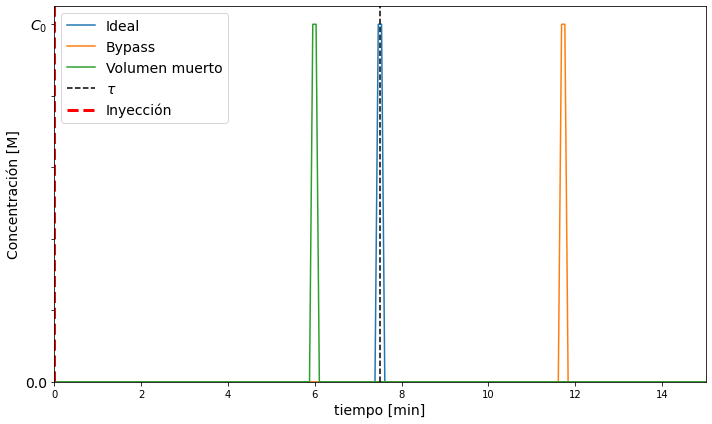

In [18]:
fig, ax = grafico_concentracion_tiempo(t, c_ideal, label="Ideal")
ax.plot(t, c_sb, label="Bypass")
ax.plot(t, c_sd, label="Volumen muerto")
ax.axvline(x = tau, color="k", linestyle="--", label=r"$\tau$")
ax.axvline(x = 0, color="r", linestyle="--", label="Inyección", linewidth=3)
ax.legend(fontsize=14)
ax.yaxis.set_ticks(np.linspace(0, C0, 6))
ax.set_yticklabels(
    [0.0] + [''] * 4 + [r'$C_{0}$'], fontsize=14
)
fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "salida_pulso_pfr_model.png"))

### Tanques en serie

La salida del trazador de $n$ tanques en serie:

$$
E(\Theta) = \tau E(t) = \frac{n \left ( n \Theta \right )^{n-1}}{(n-1) !} e^{-n \Theta} \text{ con } \Theta = \frac{t}{\tau}
$$

In [19]:
import math

def e_serie(theta, n = 1):
    return n * np.power(n * theta, n - 1) * np.exp(-n * theta) / math.factorial(n - 1)

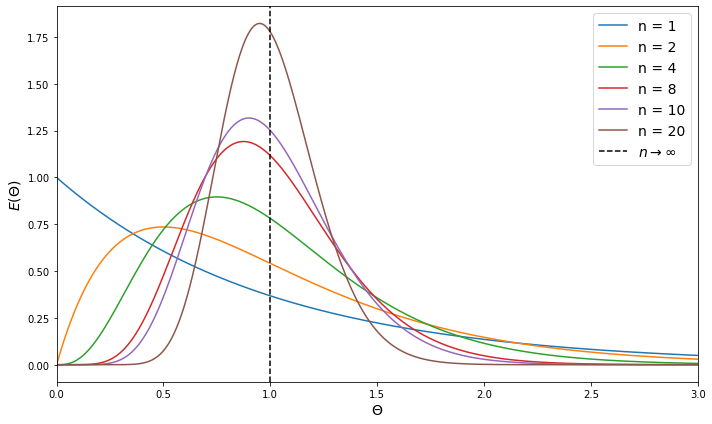

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

theta = np.linspace(0, 3, 1000)

for n in [1, 2, 4, 8, 10, 20]:
    ax.plot(theta, e_serie(theta, n=n), label="n = {}".format(n))

ax.set_xlim(0, 3)

ax.set_xlabel(r"$\Theta$", fontsize=14)
ax.set_ylabel(r"$E(\Theta)$", fontsize=14)

ax.axvline(x = 1, color="k", linestyle="--", label=r"$n \rightarrow \infty$")
ax.legend(fontsize=14)

fig.tight_layout()
fig.savefig(os.path.join(FOLDER, "salida_pulso_cstr_serie.png"))